In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/Swift J1727.8-163.txt")

Swift J1727.8-163
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,Swift J1727.8-163,68,[Hughes et al. 2025c & https://ui.adsabs.harva...,[Hughes et al. 2025c & https://ui.adsabs.harva...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,Swift J1727.8-163,1693144877,L,60183.65481,0.010417,rise,HS,46.77,2.338692,0.03,NaN,NaN,False
1,Swift J1727.8-163,1693837274,L,60191.66891,0.010417,peak/trough,HS,91.58,4.579175,0.04,NaN,NaN,False
2,Swift J1727.8-163,1694011170,L,60193.64001,0.010417,peak/trough,HS,95.57,4.778762,0.05,NaN,NaN,False
3,Swift J1727.8-163,1694179874,L,60195.63401,0.010417,peak/trough,HS,86.64,4.332185,0.04,NaN,NaN,False
4,Swift J1727.8-163,1694873611,L,60203.65151,0.010417,peak/trough,HS,85.15,4.257688,0.04,NaN,NaN,False


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,Swift J1727.8-163,1186959006,60184.68804,0.060070,peak/trough,HS,2.571000e-07,2.571888e-08,2.571889e-08,tbabs*(pegpwrlw+diskbb),chi,False
1,Swift J1727.8-163,1186959007,60185.68130,0.052388,peak/trough,HS,2.563000e-07,2.564075e-08,2.564075e-08,tbabs*(pegpwrlw+diskbb),chi,False
2,Swift J1727.8-163,1186959008,60186.57639,0.043936,peak/trough,HS,2.587000e-07,2.588396e-08,2.588395e-08,tbabs*(pegpwrlw+diskbb),chi,False
3,Swift J1727.8-163,1186959009,60187.72980,0.011129,peak/trough,HS,2.945000e-07,2.949518e-08,2.949502e-08,tbabs*(pegpwrlw+diskbb),chi,False


# Light Curves

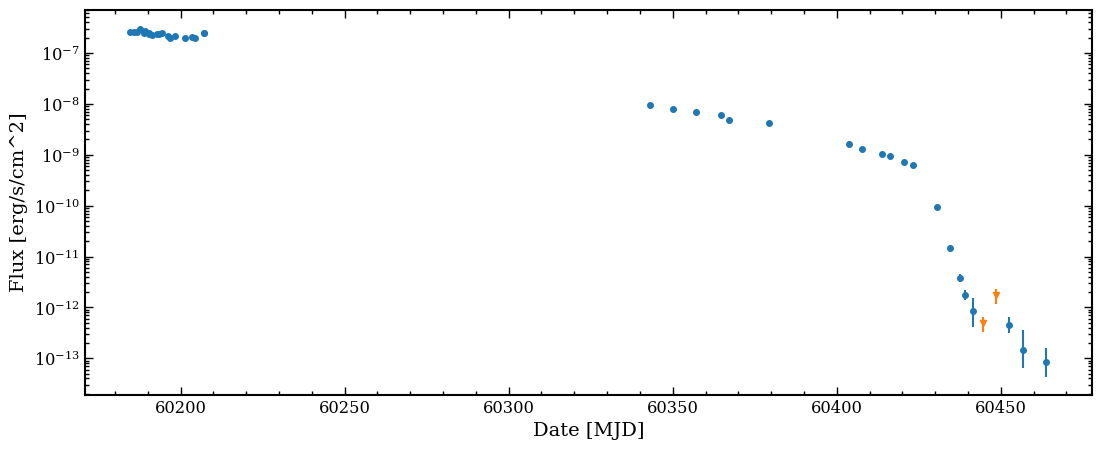

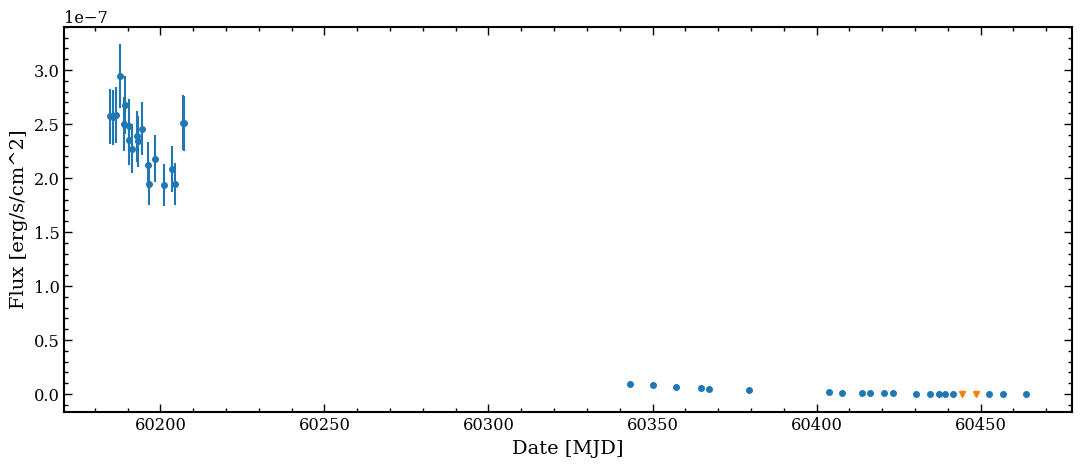

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

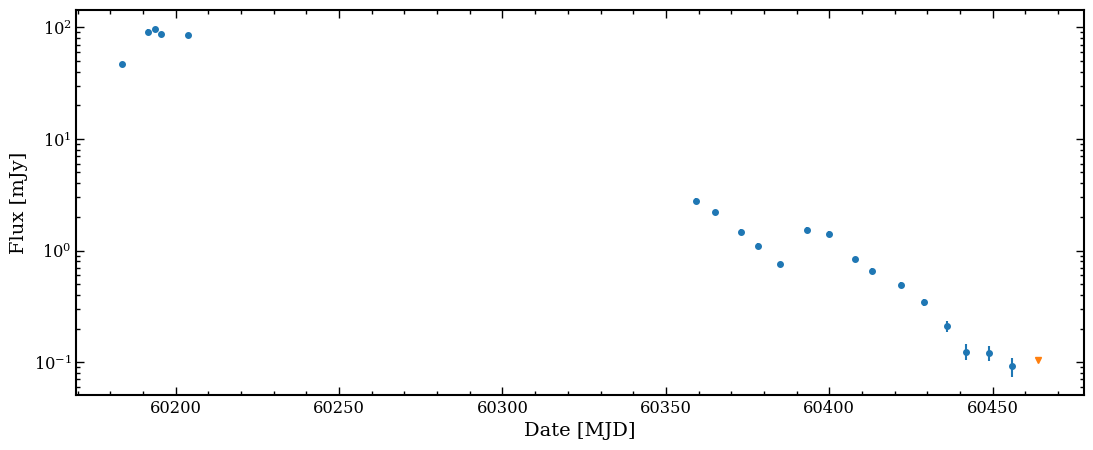

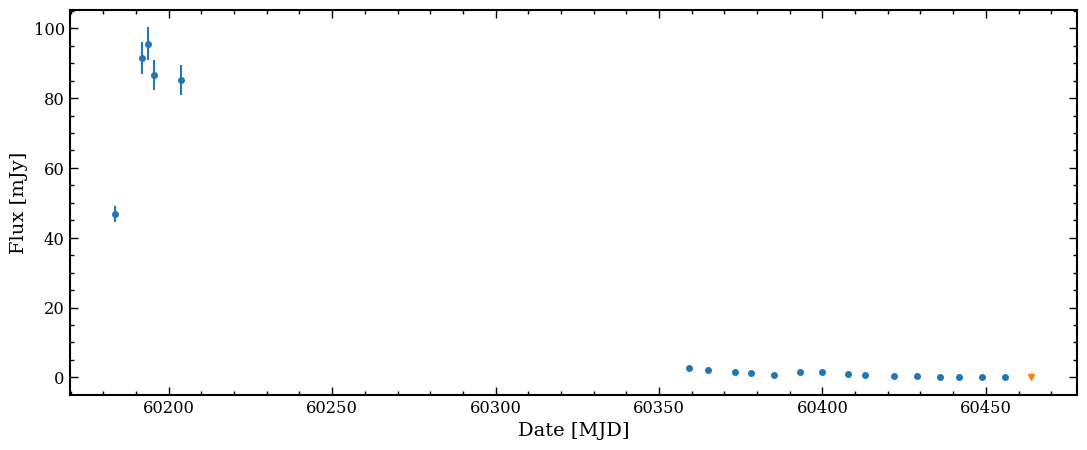

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
60191.668910000     91.58000            4.57917             1         2.27200e-07                   2.27576e-08                   2.27574e-08                   False          False          HS             
60193.640010000     95.57000            4.77876             3         2.39139e-07                   1.38317e-08                   1.38316e-08                   False          False          HS             
60195.634010000     86.64000            4.33218             1         2.12100e-07                   2.12328e-08                   2.12328e-08                   False          False          HS             
60203.651510000     85.15000            4.25769             2         2.00902e-07                   1.42448e-08                   1.42446e-08                   False          F

In [9]:
lr_all, lx_all, all_types = get_bahramian_data()

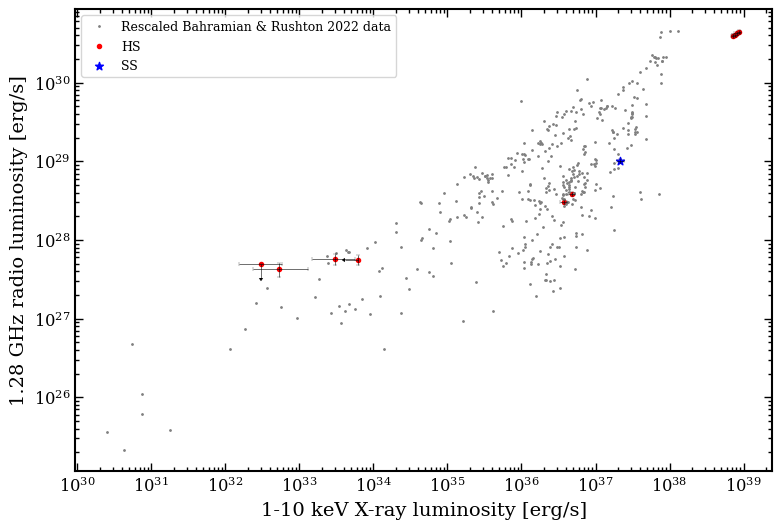

In [10]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  558
Rejected based on distance: radio_MJD = 60183.65481; time_to_nearest: 1.0332300000009127; time_to_furthest: 60183.65481
60191.66891: time_to_nearest: 0.36396000000240747 & time_to_furthest: 1.1421600000030594; y_predict_err: 0.043513964348787404
60193.64001: time_to_nearest: 0.3272400000059861 & time_to_furthest: 0.7551800000001094; y_predict_err: 0.03878261291851537
60195.63401: time_to_nearest: 0.48109000000113156 & time_to_furthest: 1.2388199999986682; y_predict_err: 0.04297307340231349
60203.65151: time_to_nearest: 0.06820000000152504 & time_to_furthest: 0.7554999999993015; y_predict_err: 0.04512818506069216
60359.14833: time_to_nearest: 2.083810000003723 & time_to_furthest: 5.626299999996263; y_predict_err: 0.04173730312765933
60365.12108: time_to_nearest: 0.3464499999972759 & time_to_furthest: 2.148430000001099; y_predict_err: 0.04312676058151865
Rejected based on distance: radio_MJD = 60373.1155; time_to_nearest: 5.84599000000

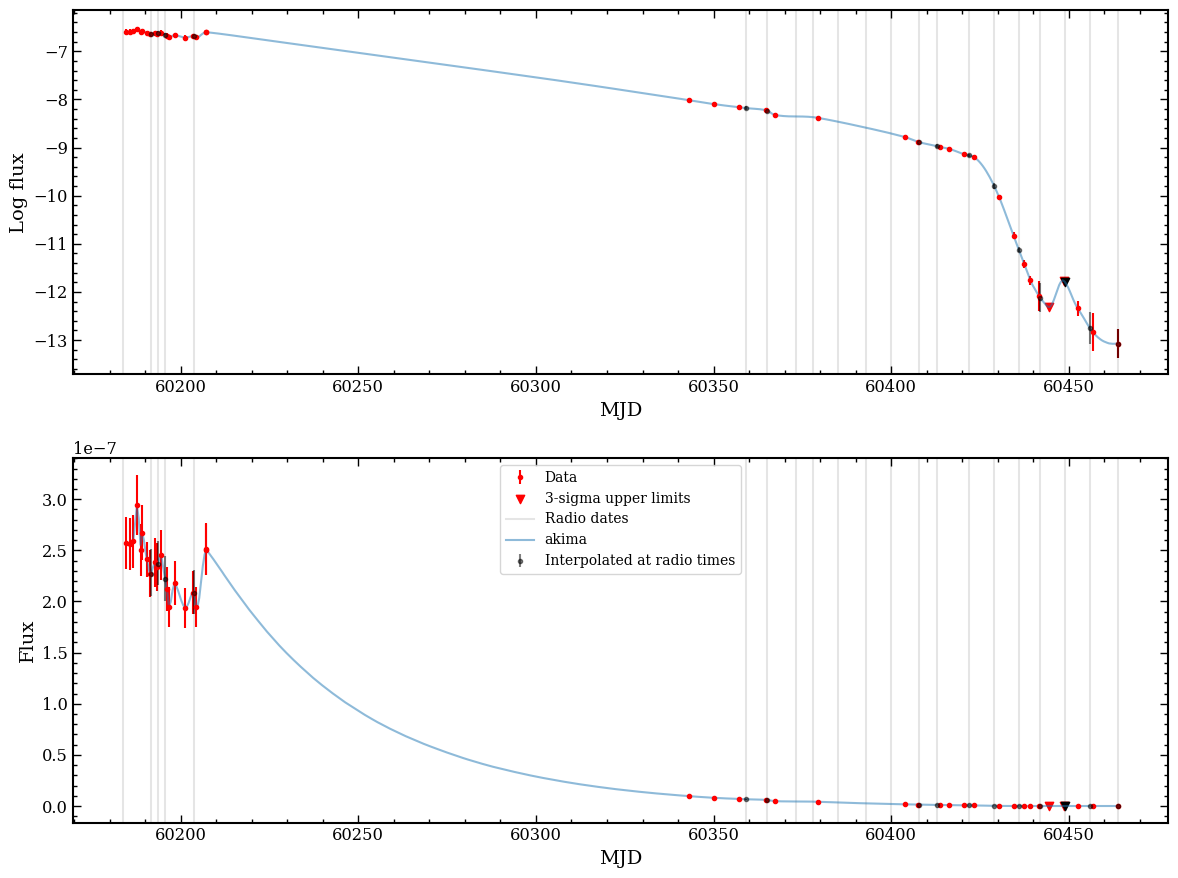

Number of used interpolated data points:  15
Converting to luminosity using d_kpc = 5.5


In [15]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

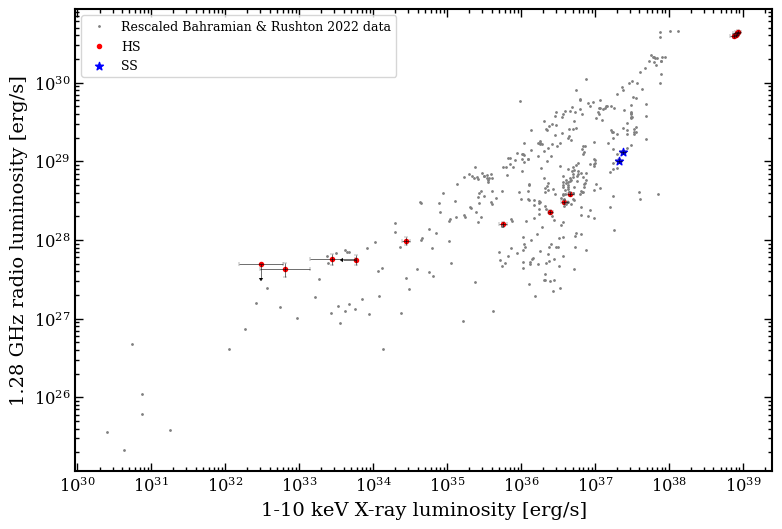

In [12]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)

dt1, dt2:  3.0 10.0

Number of plotting points:  44
Rejected based on distance: radio_MJD = 60183.65481; time_to_nearest: 1.0332300000009127; time_to_furthest: 60183.65481
60191.66891: time_to_nearest: 0.36396000000240747 & time_to_furthest: 1.1421600000030594; y_predict_err: 0.04409740032150111
60193.64001: time_to_nearest: 0.3272400000059861 & time_to_furthest: 0.7551800000001094; y_predict_err: 0.039917503441592395
60195.63401: time_to_nearest: 0.48109000000113156 & time_to_furthest: 1.2388199999986682; y_predict_err: 0.04401117663378429

LOG ERRORS:
[       nan 0.0440974  0.0399175  0.04401118]



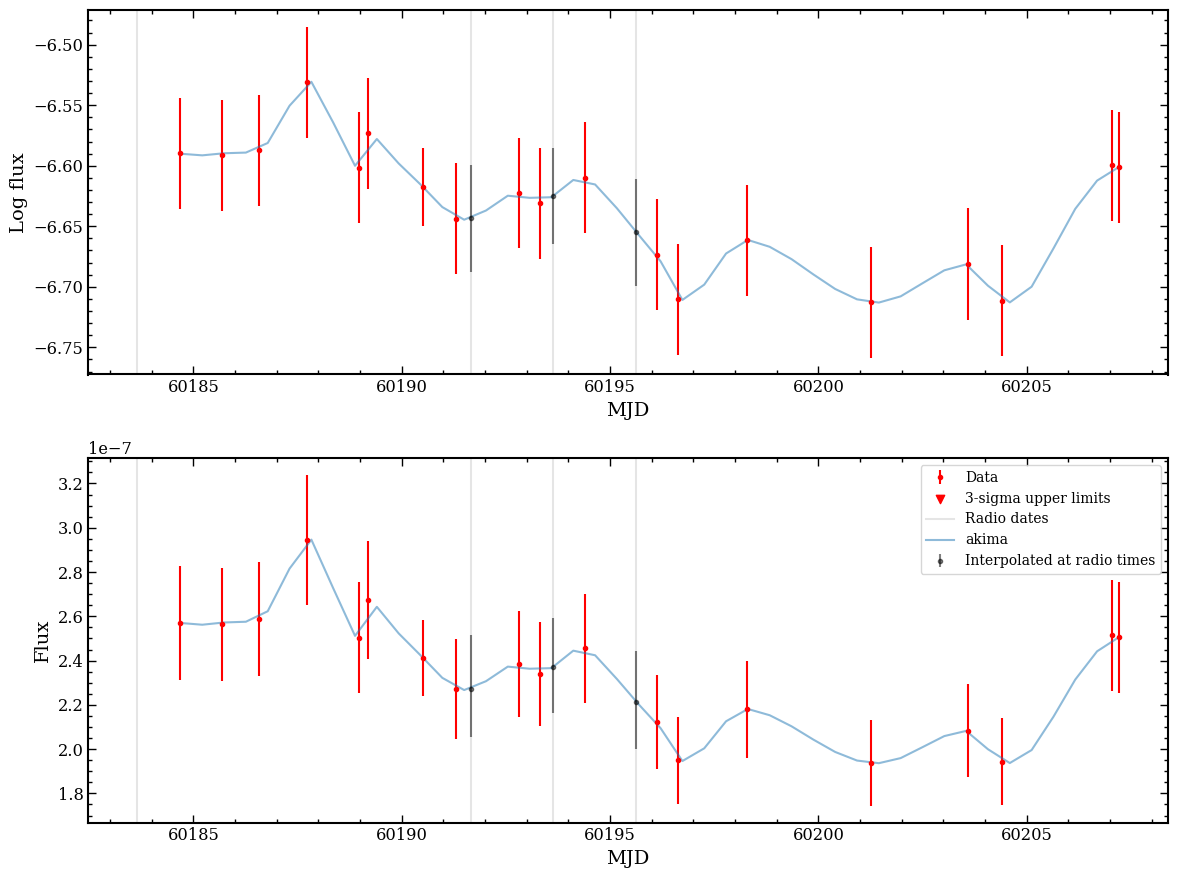

Number of used interpolated data points:  3
Converting to luminosity using d_kpc = 5.5


In [14]:
# Zoom in on the interpolation
interpolated_data = make_interpolated_Lr_Lx_df(radio_df[:-17], xray_df[:-22], source_df, save=False)